## Predicting Machine Failure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [2]:
# Generate synthetic data for equipment sensor readings
def generate_synthetic_data(num_samples=1000, sequence_length=50, num_features=5, anomaly_prob=0.1):
    data = np.random.normal(0, 1, size=(num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)
    for i in range(num_samples):
        if np.random.rand() < anomaly_prob:
            start_idx = np.random.randint(0, sequence_length // 2)
            end_idx = np.random.randint(start_idx + 1, sequence_length)
            data[i, start_idx:end_idx] += 5
            labels[i] = 1
    return data, labels

In [3]:
# Create GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(32, input_shape=input_shape))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
    return model

In [5]:
X, y = generate_synthetic_data()
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:
model = create_gru_model(input_shape=(X_train.shape[1], X_train.shape[2]))
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=True)

2025-03-15 18:38:20.011153: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-03-15 18:38:20.011193: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-03-15 18:38:20.011196: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-03-15 18:38:20.011217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-15 18:38:20.011230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/jorocca/tf_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential 

Epoch 1/10


2025-03-15 18:38:21.251172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6655 - loss: 0.6624 - val_accuracy: 0.8850 - val_loss: 0.5719
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9032 - loss: 0.5331 - val_accuracy: 0.9100 - val_loss: 0.3956
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9052 - loss: 0.3439 - val_accuracy: 0.9100 - val_loss: 0.2561
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8996 - loss: 0.2906 - val_accuracy: 0.9250 - val_loss: 0.2032
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9381 - loss: 0.1760 - val_accuracy: 0.9900 - val_loss: 0.0527
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9858 - loss: 0.0538 - val_accuracy: 0.9900 - val_loss: 0.0392
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9941 - loss: 0.0333 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9971 - loss: 0.0204 - val_accuracy: 0.9950 - val_loss: 0.

In [8]:
# Evaluate model
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0


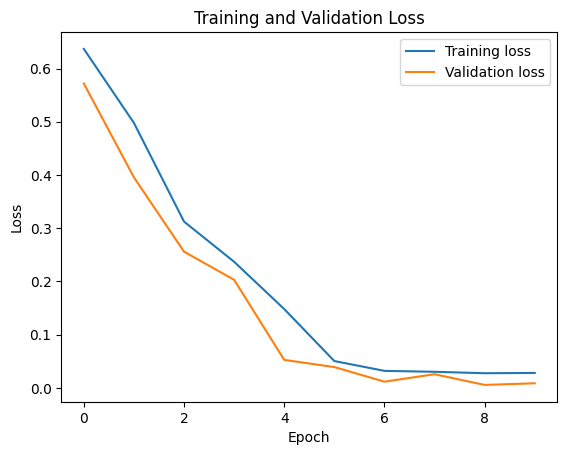

In [9]:
# Create visual
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()